In [22]:
# Import the packages 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create

pd.options.mode.chained_assignment = None


# Read in the data
df = pd.read_csv(r'/Users/edugenet/Downloads/movies.csv')

In [5]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/86,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/86,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/86,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/86,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/86,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [7]:
df.columns.values

array(['budget', 'company', 'country', 'director', 'genre', 'gross',
       'name', 'rating', 'released', 'runtime', 'score', 'star', 'votes',
       'writer', 'year'], dtype=object)

In [8]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [9]:
#Data types for the columns

df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

<AxesSubplot:>

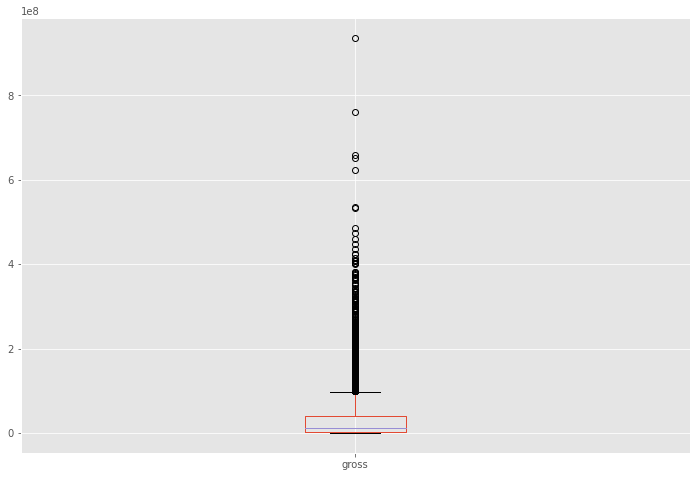

In [3]:
#Check for Outliers 

df.boxplot(column=['gross'])

In [10]:
#Changing data types 
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [19]:
#create year column

df['yearcorrect'] = df['released'].astype(str)
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/86,89,8.1,Wil Wheaton,299174,Stephen King,1986,8/22/86
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/86,103,7.8,Matthew Broderick,264740,John Hughes,1986,6/11/86
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/86,110,6.9,Tom Cruise,236909,Jim Cash,1986,5/16/86
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/86,137,8.4,Sigourney Weaver,540152,James Cameron,1986,7/18/86
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/86,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,8/1/86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,7/22/16,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,7/22/16
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,5/6/16,90,4.9,Selma Blair,1959,Paige Cameron,2016,5/6/16
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,7/25/16,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,7/25/16
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,12/2/16,76,6.2,Kika Magalh„es,6947,Nicolas Pesce,2016,12/2/16


In [10]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/86,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/86,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/86,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/86,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/86,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
#To display all rows
#pd.set_option('display.max_rows', None)

In [9]:
#Drop any duplicates

df.drop_duplicates()
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/86,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/86,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/86,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/86,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/86,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


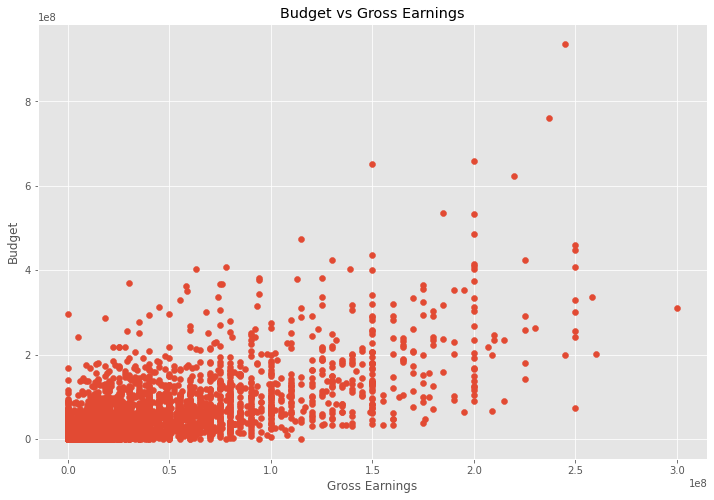

In [29]:
##Correlation Comparison
#scatter plot with budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()



<AxesSubplot:xlabel='budget', ylabel='gross'>

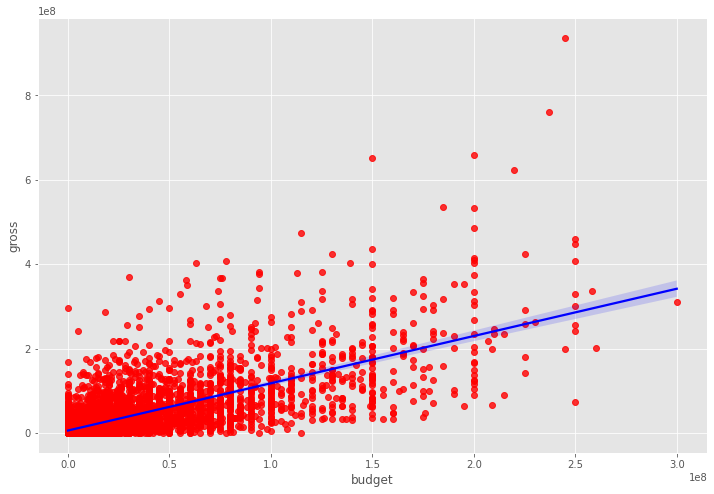

In [37]:
#Regression plot budget vs gross using seaborn 
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [ ]:
#Correlation metrix between all numeric columns
#types of correlation methods are pearson, kendall, spearman

In [11]:
df.corr(method='pearson') #Shows high correlation between budget and gross

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [12]:
df.corr(method='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.492432,0.126282,-0.053693,0.411074,0.148940
gross,0.492432,1.000000,0.114660,0.003313,0.479754,0.064873
runtime,0.126282,0.114660,1.000000,0.245634,0.193118,0.039448
score,-0.053693,0.003313,0.245634,1.000000,0.268525,0.036190
votes,0.411074,0.479754,0.193118,0.268525,1.000000,0.302008
year,0.148940,0.064873,0.039448,0.036190,0.302008,1.000000


In [15]:
df.corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


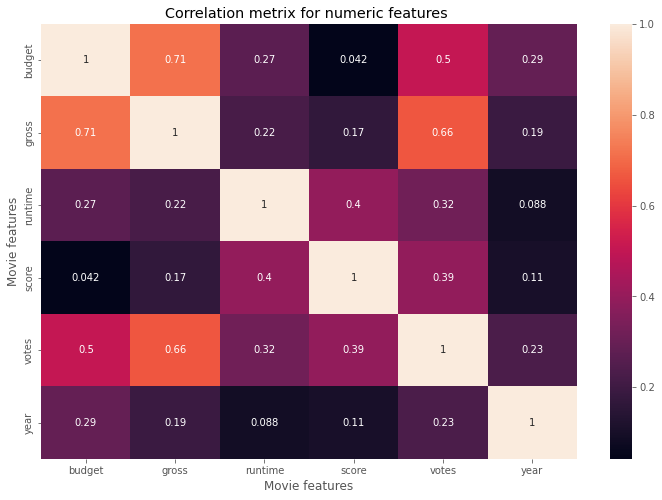

In [47]:
correlation_metrix = df.corr(method='pearson')

sns.heatmap(correlation_metrix, annot=True)
plt.title('Correlation metrix for numeric features ')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [16]:
#if we wanted to identify "company" by number instead of of their names, we can do so as follows. 
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()
        

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,665,54,2192,1,52287414,4661,8,2086,89,8.1,2454,299174,3716,1986
1,6000000,1680,54,1296,4,70136369,1821,7,1586,103,7.8,1605,264740,1970,1986
2,15000000,1680,54,2645,0,179800601,6203,6,1415,110,6.9,2345,236909,1852,1986
3,18500000,2062,54,1066,0,85160248,295,8,1841,137,8.4,2192,540152,1629,1986
4,9000000,2122,54,2123,1,18564613,1872,6,1989,90,6.9,1139,36636,2549,1986


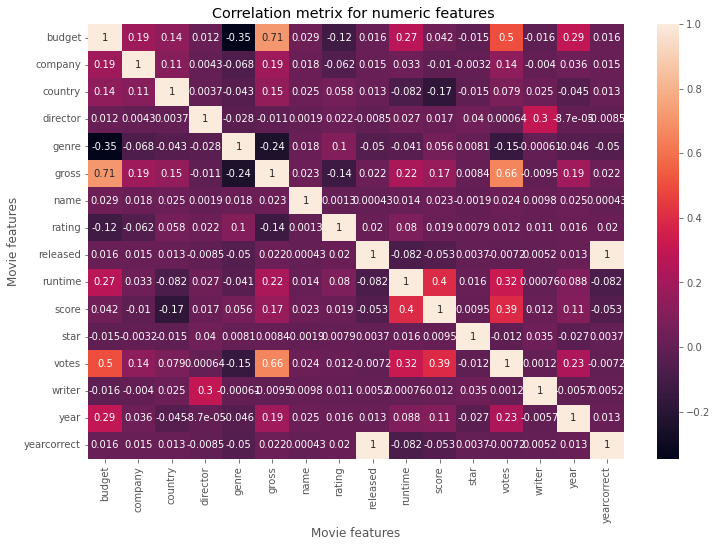

In [51]:
correlation_metrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_metrix, annot=True)
plt.title('Correlation metrix for numeric features ')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [19]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.015683,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009
company,0.187205,1.000000,0.107950,0.004321,-0.068330,0.187220,0.018098,-0.062250,0.014886,0.033058,-0.010426,-0.003160,0.138662,-0.004031,0.036272
country,0.137635,0.107950,1.000000,0.003700,-0.042793,0.149988,0.025020,0.057979,0.013288,-0.081796,-0.174414,-0.014570,0.078657,0.024982,-0.045204
director,0.011602,0.004321,0.003700,1.000000,-0.027668,-0.011429,0.001908,0.021928,-0.008476,0.026779,0.017129,0.039813,0.000639,0.298996,-0.000087
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.049659,-0.041357,0.056234,0.008139,-0.150519,-0.000608,-0.046259
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.021655,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548
name,0.028712,0.018098,0.025020,0.001908,0.018062,0.022768,1.000000,0.001288,0.000427,0.013942,0.023342,-0.001910,0.023665,0.009822,0.024624
rating,-0.119660,-0.062250,0.057979,0.021928,0.100960,-0.135538,0.001288,1.000000,0.019698,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221
released,0.015683,0.014886,0.013288,-0.008476,-0.049659,0.021655,0.000427,0.019698,1.000000,-0.081744,-0.053031,0.003738,-0.007169,0.005223,0.012811
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,-0.081744,1.000000,0.395343,0.016020,0.317399,0.000759,0.087639


In [17]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head(20)

budget   budget      1.000000
         company     0.187205
         country     0.137635
         director    0.011602
         genre      -0.346794
         gross       0.712196
         name        0.028712
         rating     -0.119660
         released    0.015683
         runtime     0.268226
         score       0.042145
         star       -0.015062
         votes       0.503924
         writer     -0.015611
         year        0.291009
company  budget      0.187205
         company     1.000000
         country     0.107950
         director    0.004321
         genre      -0.068330
dtype: float64

In [18]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(20)

genre     budget     -0.346794
budget    genre      -0.346794
genre     gross      -0.242676
gross     genre      -0.242676
country   score      -0.174414
score     country    -0.174414
genre     votes      -0.150519
votes     genre      -0.150519
gross     rating     -0.135538
rating    gross      -0.135538
          budget     -0.119660
budget    rating     -0.119660
country   runtime    -0.081796
runtime   country    -0.081796
released  runtime    -0.081744
runtime   released   -0.081744
genre     company    -0.068330
company   genre      -0.068330
rating    company    -0.062250
company   rating     -0.062250
dtype: float64

In [24]:
# We can now take a look at the ones that have a high correlation (> 0.5)
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     budget      0.503924
budget    votes       0.503924
votes     gross       0.662457
gross     votes       0.662457
          budget      0.712196
budget    gross       0.712196
          budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

In [20]:
#votes and budget have the highest correlation to gross

In [23]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64